<a href="https://colab.research.google.com/github/asmasw6/Agriculture-Crop-Yield-Prediction/blob/main/%F0%9F%93%88_Agriculture_Crop_Yield_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error , mean_absolute_percentage_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib


In [2]:
data = pd.read_csv('/content/crop_yield.csv')

In [3]:
data.head(10)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
5,South,Silt,Soybean,797.471182,37.704974,False,True,Rainy,74,5.898416
6,West,Clay,Wheat,357.902357,31.593431,False,False,Rainy,90,2.652392
7,South,Sandy,Rice,441.131154,30.887107,True,True,Sunny,61,5.829542
8,North,Silt,Wheat,181.587861,26.752729,True,False,Sunny,127,2.943716
9,West,Sandy,Wheat,395.048968,17.646199,False,True,Rainy,140,3.707293


In [4]:
df = data.copy()

In [5]:
print(" Dataset Information: ")
data.info()

 Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [6]:
# Convert booleans to integers
data['Fertilizer_Used'] = data['Fertilizer_Used'].astype(int)
data['Irrigation_Used'] = data['Irrigation_Used'].astype(int)


In [7]:
print("\n ------------ Descriptive Statistics ------------")
data.describe(include='all')


 ------------ Descriptive Statistics ------------


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
count,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000,1000000.000000,1000000.000000
unique,4,6,6,NaN,NaN,NaN,NaN,3,NaN,NaN
top,North,Sandy,Maize,NaN,NaN,NaN,NaN,Sunny,NaN,NaN
freq,250173,167119,166824,NaN,NaN,NaN,NaN,333790,NaN,NaN
mean,NaN,NaN,NaN,549.981901,27.504965,0.49994,0.499491,NaN,104.495025,4.649472
std,NaN,NaN,NaN,259.851320,7.220608,0.50000,0.500000,NaN,25.953412,1.696572
min,NaN,NaN,NaN,100.000896,15.000034,0.00000,0.000000,NaN,60.000000,-1.147613
25%,NaN,NaN,NaN,324.891090,21.254502,0.00000,0.000000,NaN,82.000000,3.417637
50%,NaN,NaN,NaN,550.124061,27.507365,0.00000,0.000000,NaN,104.000000,4.651808
75%,NaN,NaN,NaN,774.738520,33.753267,1.00000,1.000000,NaN,127.000000,5.879200


In [8]:
print("\nMissing Values:")

data.isnull().sum()



Missing Values:


,0
Region,0
Soil_Type,0
Crop,0
Rainfall_mm,0
Temperature_Celsius,0
Fertilizer_Used,0
Irrigation_Used,0
Weather_Condition,0
Days_to_Harvest,0
Yield_tons_per_hectare,0


In [9]:
print("\nduplicated Values:")
data.duplicated().sum()


duplicated Values:


np.int64(0)

#📊 Exploratory Data Analysis (EDA)


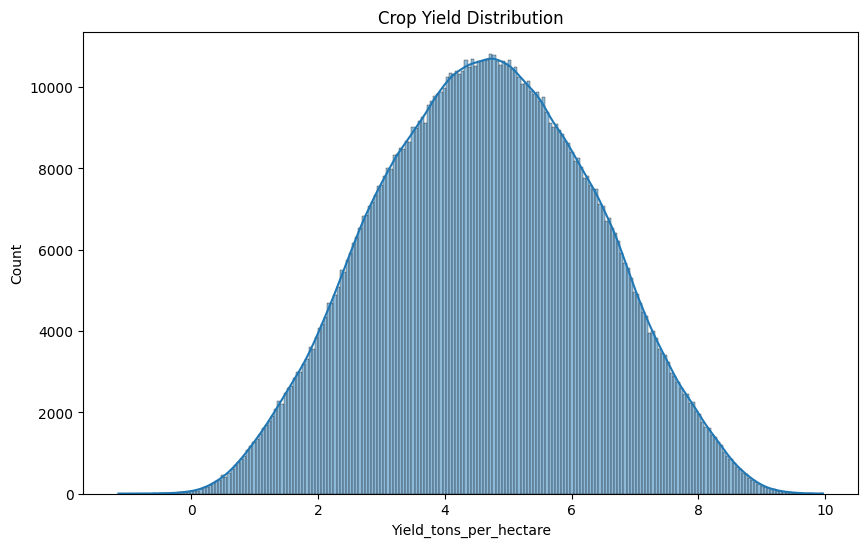

In [10]:
# Yield Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Yield_tons_per_hectare'], kde=True)
plt.title("Crop Yield Distribution")
plt.show()

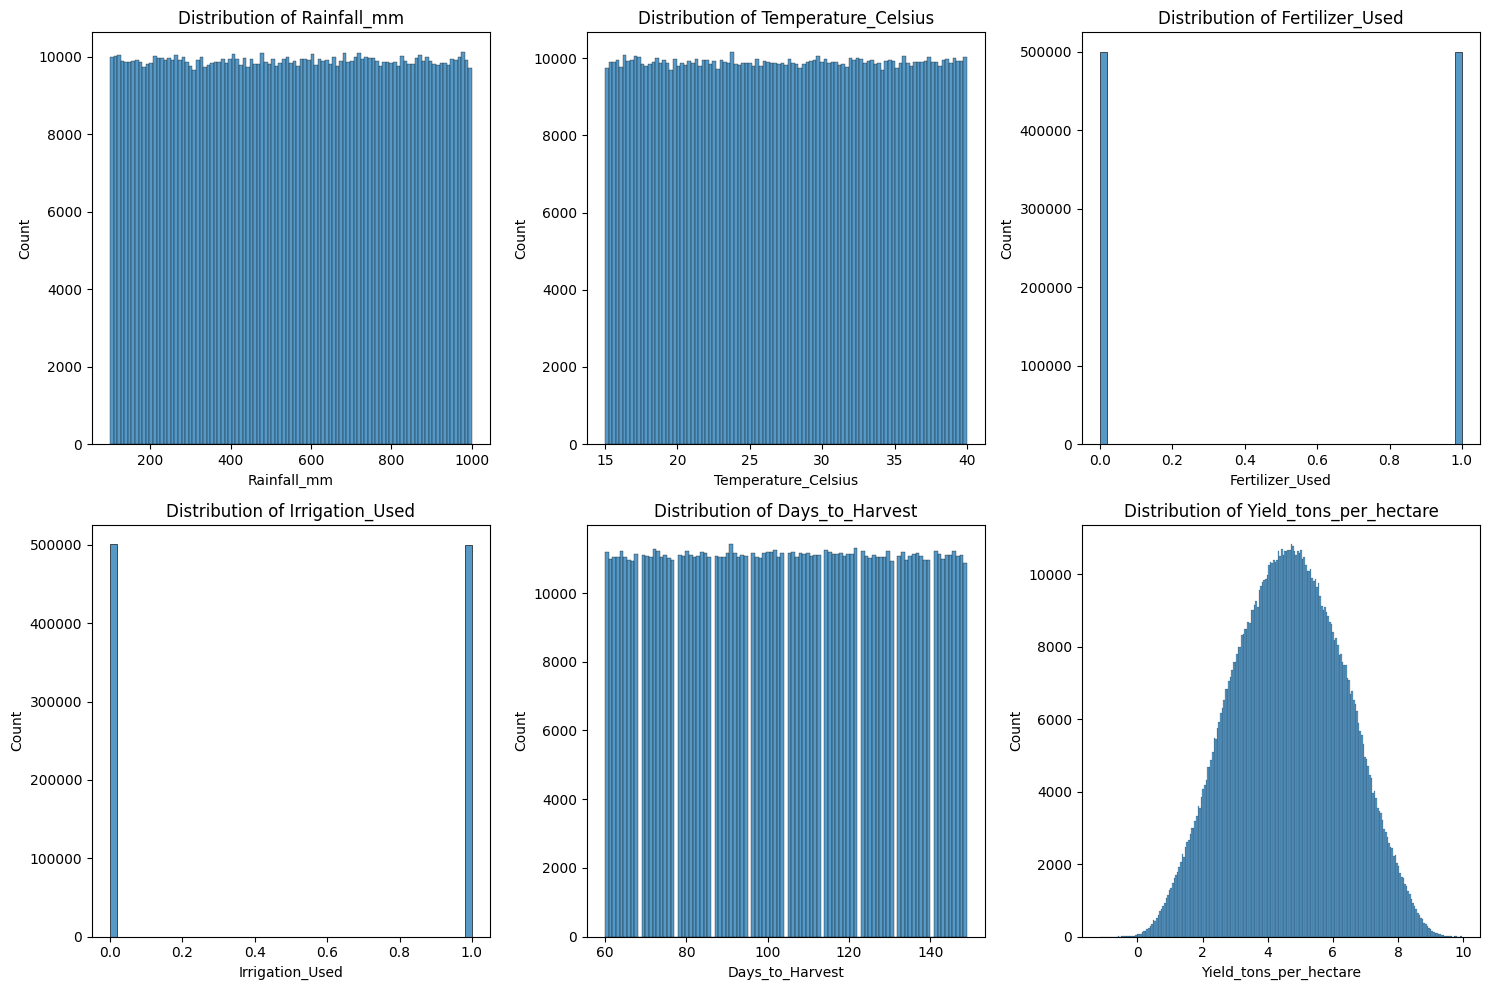

In [11]:
numerical_columns = data.select_dtypes(include=['number']).columns
numerical_columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(x=data[column])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [12]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Region', 'Soil_Type', 'Crop', 'Weather_Condition'], dtype='object')

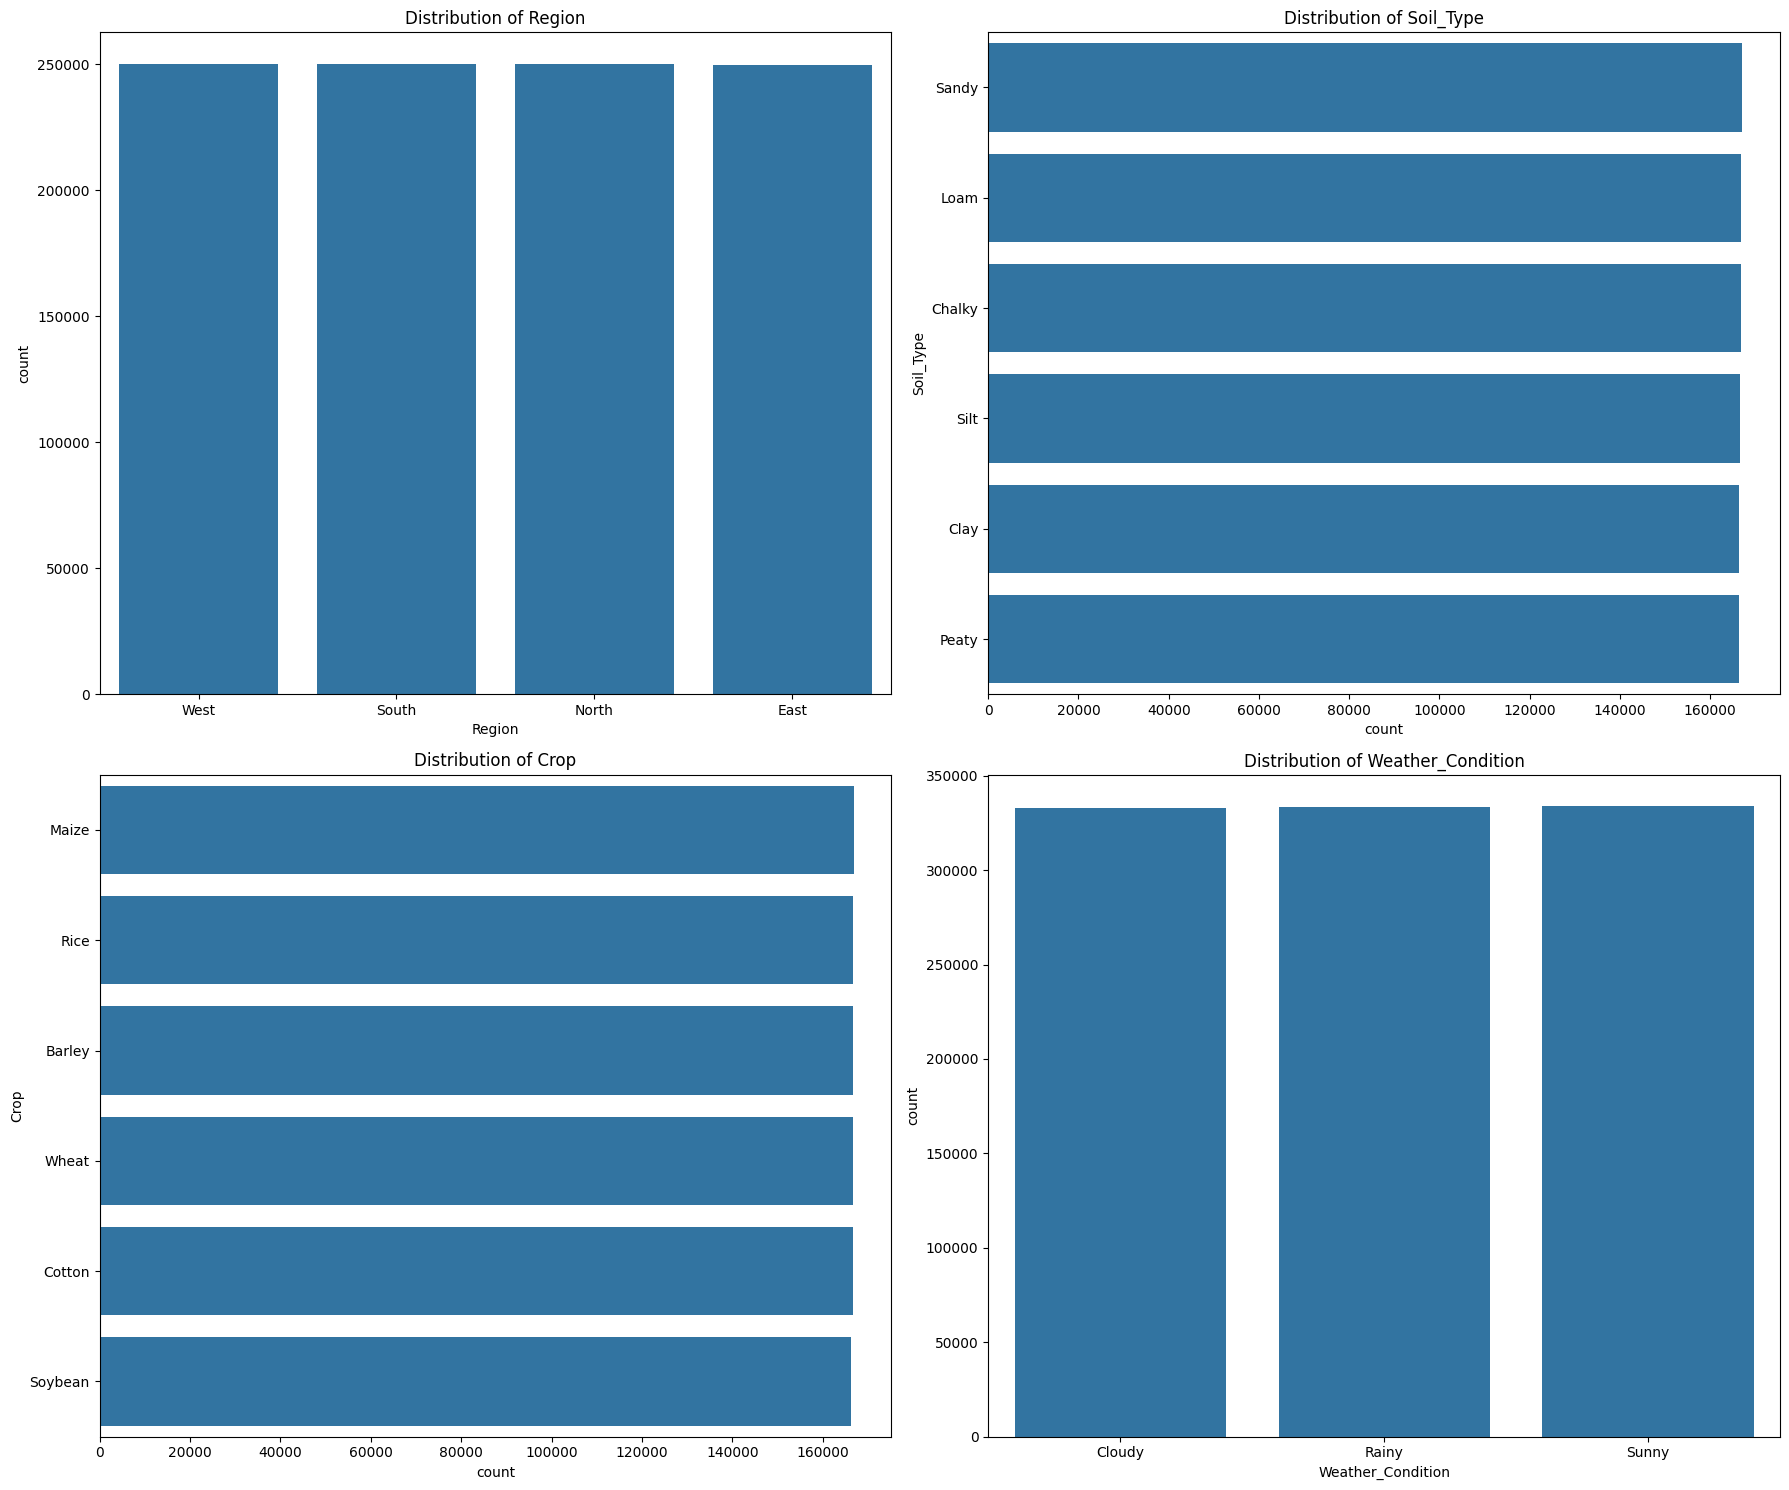

In [13]:
plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    if data[col].nunique() > 5:  # For high-cardinality features
        sns.countplot(y=col, data=data, order=data[col].value_counts().index)
        # insures the bars are sorted by count (most frequent values on top).
    else:
        sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [14]:
data['Soil_Type'].value_counts()

,count
Soil_Type,
Sandy,167119
Loam,166795
Chalky,166779
Silt,166672
Clay,166352
Peaty,166283


#EDA

### 1. 🌱 Yield Distribution by Soil Type
### 2. 🌧 Rainfall vs. Yield Scatter Plot
### 3. 🌡️ Temperature Impact on Yield (per Crop)
### 4. 💧 Irrigation vs. Yield (Grouped Bar Plot)


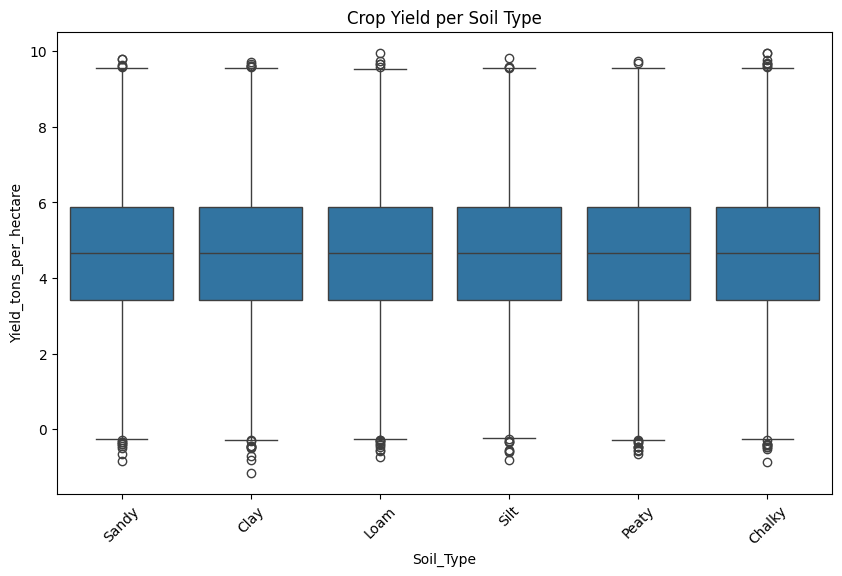

In [15]:
# 1
plt.figure(figsize=(10,6))
sns.boxplot(x='Soil_Type', y='Yield_tons_per_hectare', data=data)
plt.xticks(rotation=45)
plt.title('Crop Yield per Soil Type')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


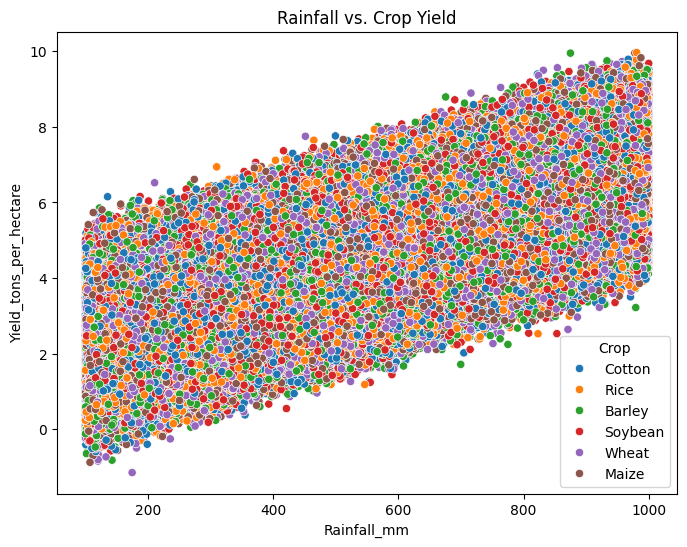

In [16]:

#2
plt.figure(figsize=(8,6))
sns.scatterplot(x='Rainfall_mm', y='Yield_tons_per_hectare', hue='Crop', data=data)
plt.title('Rainfall vs. Crop Yield')
plt.show()

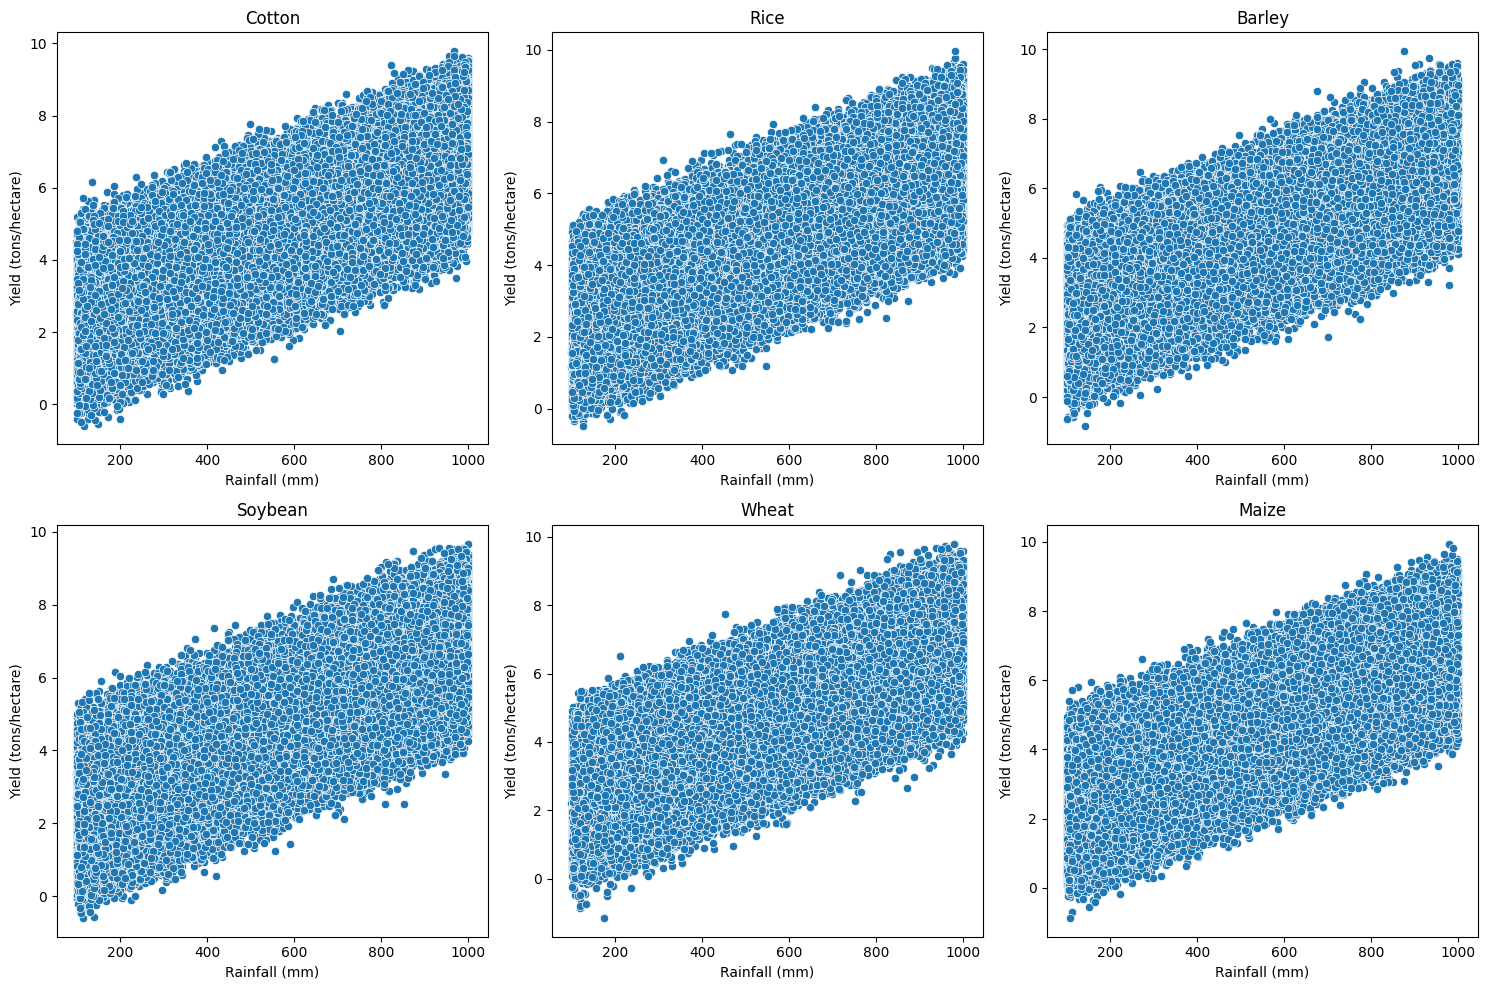

In [17]:

crops = ['Cotton', 'Rice', 'Barley', 'Soybean', 'Wheat', 'Maize']
plt.figure(figsize=(15, 10))  # Adjust size as needed

for i, crop in enumerate(crops, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    crop_data = data[data['Crop'] == crop]
    sns.scatterplot(x='Rainfall_mm', y='Yield_tons_per_hectare', data=crop_data)
    plt.title(f'{crop}')
    plt.xlabel('Rainfall (mm)')
    plt.ylabel('Yield (tons/hectare)')

plt.tight_layout()
plt.show()

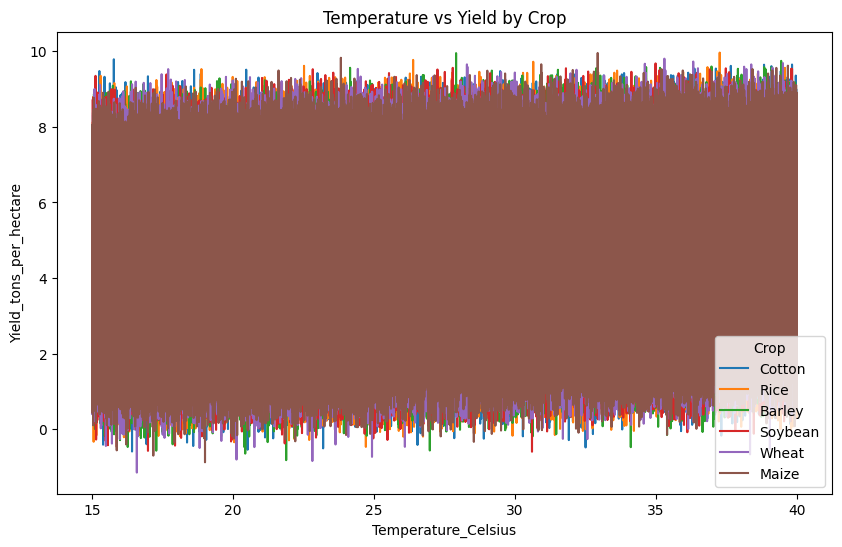

In [18]:
#3

plt.figure(figsize=(10,6))
sns.lineplot(x='Temperature_Celsius', y='Yield_tons_per_hectare' , hue='Crop', data=data)
plt.title('Temperature vs Yield by Crop')
plt.show()

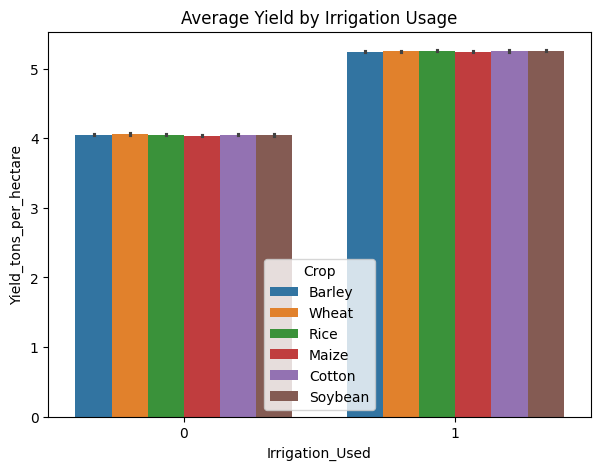

In [19]:
#4

plt.figure(figsize=(7,5))
sns.barplot(x='Irrigation_Used', y='Yield_tons_per_hectare' , hue='Crop', data=data)
plt.title('Average Yield by Irrigation Usage')
plt.show()

#🧹 Data Cleaning (Preprocessing)


In [20]:
label_encoders = {}

# Apply label encoding
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoder for inverse transform later

In [21]:
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']

In [22]:
# Verify encoding
print("\n=== Encoded Values Sample ===")
data[categorical_columns].head()


=== Encoded Values Sample ===


,Region,Soil_Type,Crop,Weather_Condition
0,3,4,1,0
1,2,1,3,1
2,1,2,0,2
3,1,4,4,1
4,2,5,5,0


In [23]:
# After fitting all label encoders, display mappings for each categorical column
print("\n=== Label Encoding Mappings ===")
for col in categorical_columns:
    print(f"\n{col} Mapping:")
    mapping = {label: int(code) for label, code in zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_))}
    print(mapping)


=== Label Encoding Mappings ===

Region Mapping:
{'East': 0, 'North': 1, 'South': 2, 'West': 3}

Soil_Type Mapping:
{'Chalky': 0, 'Clay': 1, 'Loam': 2, 'Peaty': 3, 'Sandy': 4, 'Silt': 5}

Crop Mapping:
{'Barley': 0, 'Cotton': 1, 'Maize': 2, 'Rice': 3, 'Soybean': 4, 'Wheat': 5}

Weather_Condition Mapping:
{'Cloudy': 0, 'Rainy': 1, 'Sunny': 2}


In [24]:
numerical_columns.unique()

Index(['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used',
       'Irrigation_Used', 'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

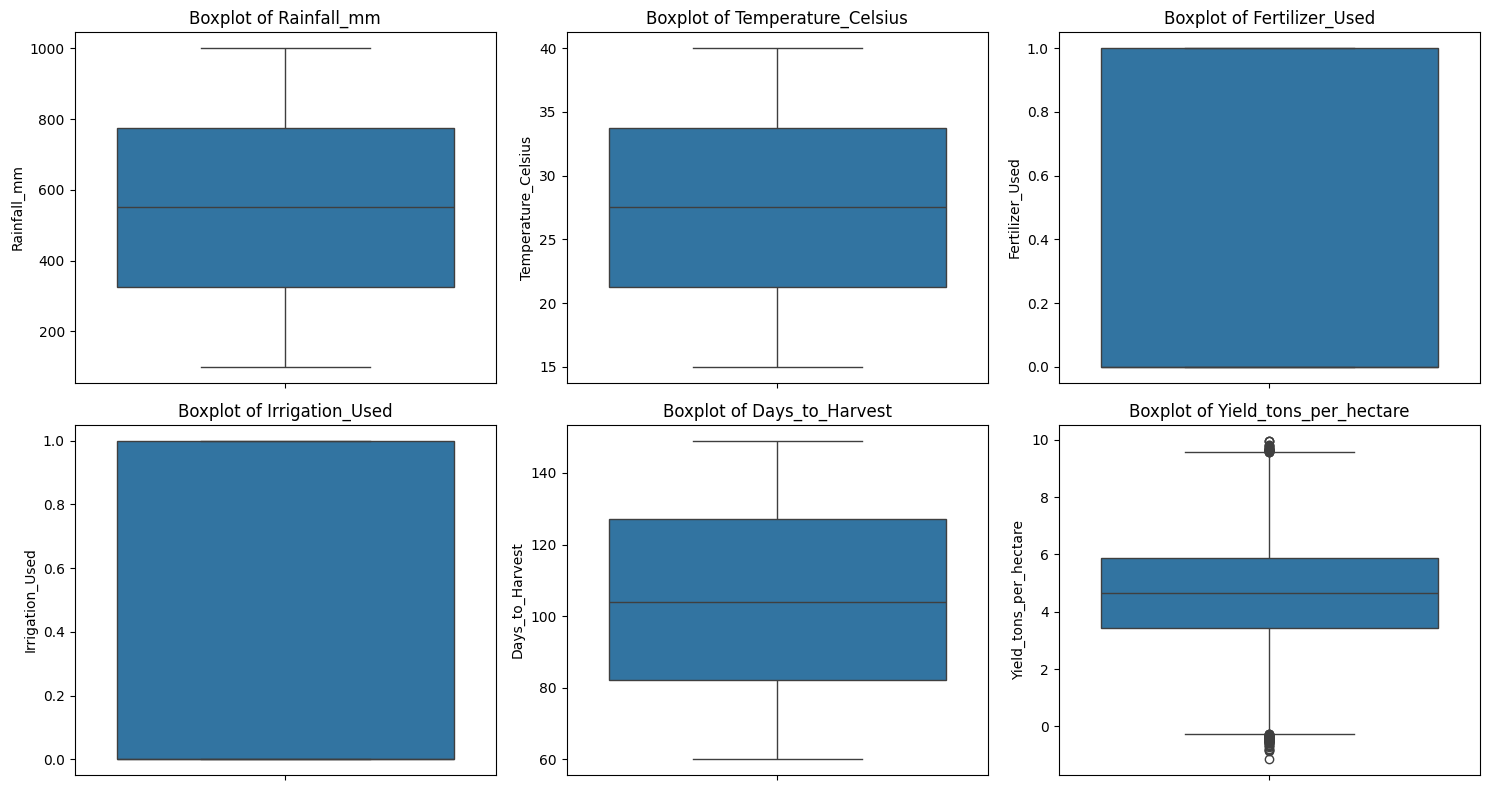

In [25]:
# Boxplots for numerical features
import math


# Calculate subplot grid size
num_plots = len(numerical_columns)
cols = 3  # You can change this to 2, 3, etc.
rows = math.ceil(num_plots / cols)
plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [26]:
corr_matrix = data.corr()

# Sort correlations with Yield_tons_per_hectare
yield_corr = corr_matrix['Yield_tons_per_hectare'].sort_values(ascending=False)

In [27]:
yield_corr

,Yield_tons_per_hectare
Yield_tons_per_hectare,1.000000
Rainfall_mm,0.764618
Fertilizer_Used,0.442099
Irrigation_Used,0.353741
Temperature_Celsius,0.085565
Crop,0.001283
Weather_Condition,0.001132
Region,0.000390
Soil_Type,-0.000333
Days_to_Harvest,-0.002591



Strong positive correlations with yield: Rainfall_mm


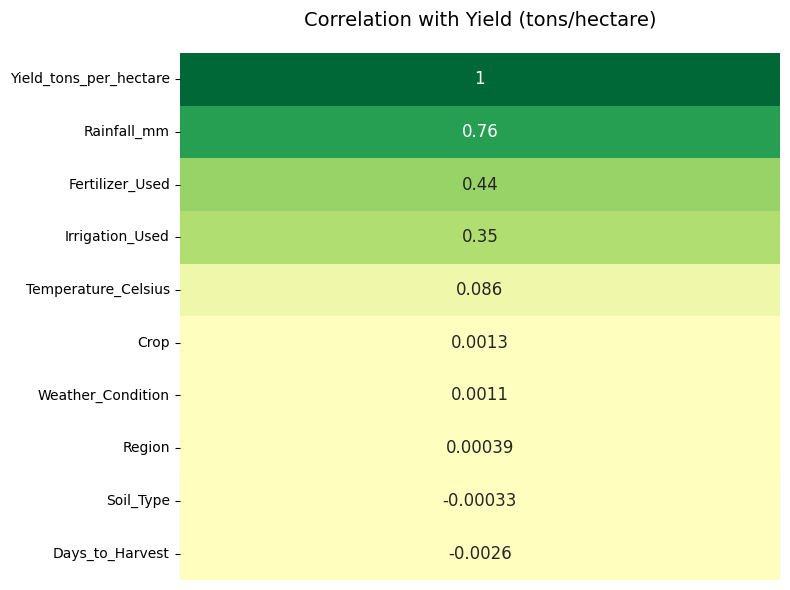

In [28]:

# Calculate correlations (numeric_only=True for safety)
corr_matrix = data.corr()

# Sort correlations with Yield_tons_per_hectare
yield_corr = corr_matrix['Yield_tons_per_hectare'].sort_values(ascending=False)

# Create a focused correlation plot
plt.figure(figsize=(8, 6))
sns.heatmap(
    yield_corr.to_frame(),  # Convert series to DataFrame for heatmap
    annot=True,
    cmap='RdYlGn',         # Red-Yellow-Green color scale
    center=0,
    vmin=-1, vmax=1,
    annot_kws={'size': 12},
    cbar=False             # Hide color bar for single column
)

# Formatting
plt.title('Correlation with Yield (tons/hectare)', pad=20, fontsize=14)
plt.xticks([])  # Remove x-axis label (we only have one column)
plt.yticks(rotation=0)
plt.tight_layout()

# Add interpretation text
strong_pos = yield_corr[(yield_corr > 0.5) & (yield_corr < 1.0)].index.tolist()
strong_neg = yield_corr[yield_corr < -0.5].index.tolist()

if strong_pos:
    print(f"\nStrong positive correlations with yield: {', '.join(strong_pos)}")
if strong_neg:
    print(f"Strong negative correlations with yield: {', '.join(strong_neg)}")

plt.show()

<Axes: >

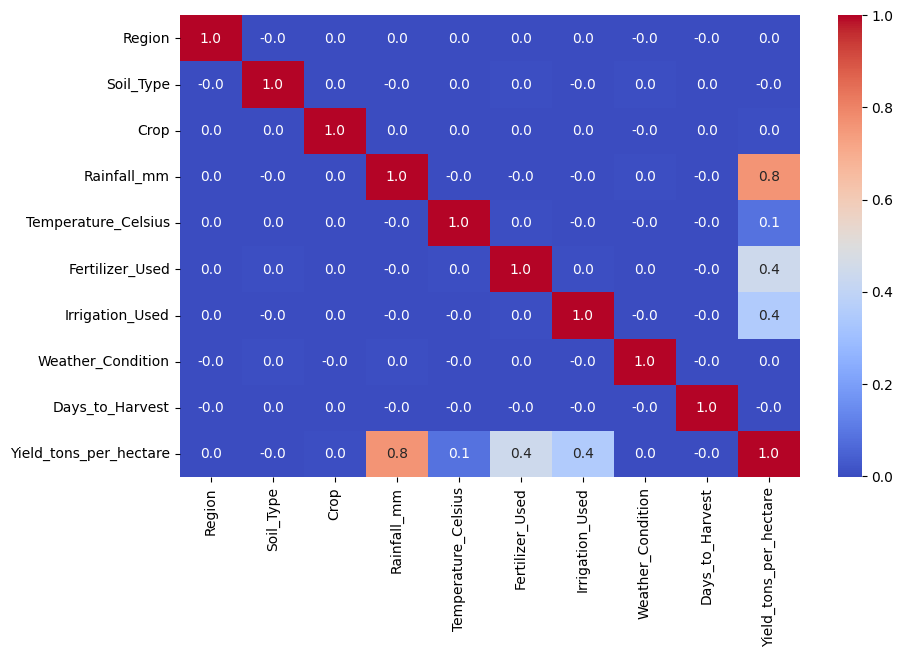

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm',fmt=".1f")

# Modeling

In [30]:
# Prepare Features and Target


X = data.drop(columns=['Yield_tons_per_hectare'])
y = data['Yield_tons_per_hectare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f"\nTraining set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (900000, 9), Test set: (100000, 9)


In [31]:
numerical_columns

Index(['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used',
       'Irrigation_Used', 'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [32]:
# Scale numerical features only
num_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Fertilizer_Used', 'Irrigation_Used']
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("\n=== Scaled Numerical Features ===")
X_train[num_cols].describe()


=== Scaled Numerical Features ===


,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Fertilizer_Used,Irrigation_Used
count,9.000000e+05,9.000000e+05,9.000000e+05,9.000000e+05,9.000000e+05
mean,5.956914e-16,-7.075111e-16,-1.348768e-16,5.084328e-17,1.995836e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.731415e+00,-1.732466e+00,-1.713339e+00,-9.995557e-01,-9.994535e-01
25%,-8.662451e-01,-8.655947e-01,-8.657229e-01,-9.995557e-01,-9.994535e-01
50%,7.871498e-04,8.351687e-04,-1.810700e-02,-9.995557e-01,-9.994535e-01
75%,8.652367e-01,8.656845e-01,8.680369e-01,1.000445e+00,1.000547e+00
max,1.732126e+00,1.729829e+00,1.715653e+00,1.000445e+00,1.000547e+00


In [33]:
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [34]:
X_train.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest
378046,3,5,5,0.244165,1.436176,-0.999556,1.000547,2,0.983621
510062,3,2,4,-1.260012,-1.269718,1.000445,-0.999453,0,0.598341
534815,3,1,2,0.715843,1.513650,1.000445,-0.999453,0,1.677125
342590,2,3,2,0.792188,-0.697742,-0.999556,1.000547,0,0.675397
559414,0,5,5,0.727887,-0.140294,1.000445,1.000547,0,-0.518971


In [35]:


# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)


# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

# Accuracy = 100 - MAPE%

# Evaluation
print("Linear Regression:")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"Accuracy: {100 - mape_lr * 100:.2f}%\ى")


print("Random Forest:")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"Accuracy: {100 - mape_rf * 100:.2f}%")

#........ 24 >>>>>>>>

Linear Regression:
R² Score: 0.91
MSE: 0.25

Accuracy: 87.71%
Random Forest:
R² Score: 0.91
MSE: 0.27
Accuracy: 87.49%


In [36]:
joblib.dump(lr, 'yield_predictor_model.joblib')


['yield_predictor_model.joblib']

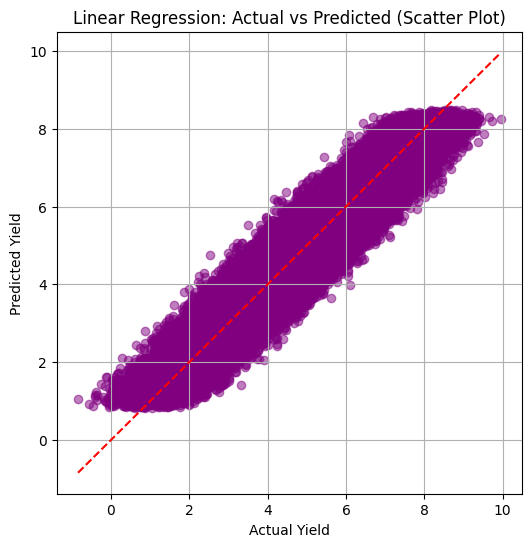

In [37]:
# 📊 Scatter Plot: y_test vs y_pred

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Linear Regression: Actual vs Predicted (Scatter Plot)")
plt.grid(True)
plt.show()


# NEW MODEL


/tmp/ipython-input-38-1774189954.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


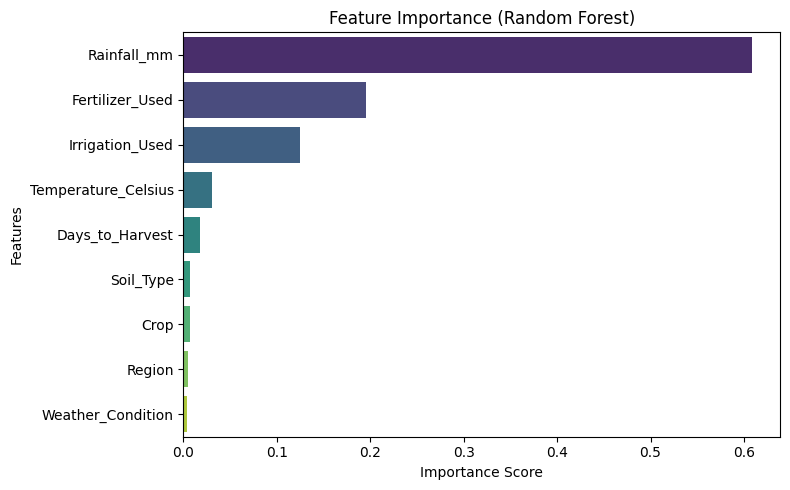

In [38]:


# Get feature importance from trained Random Forest model
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [39]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [40]:
selected_features = [
    'Rainfall_mm',
    'Fertilizer_Used',
    'Irrigation_Used',
    'Temperature_Celsius',    # optional
    'Days_to_Harvest',         # optional
    'Crop',
    'Weather_Condition'
]
X=df[selected_features]
y=df['Yield_tons_per_hectare']

In [45]:
data.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,3,4,1,897.077239,27.676966,0,1,0,122,6.555816
1,2,1,3,992.673282,18.026142,1,1,1,140,8.527341
2,1,2,0,147.998025,29.794042,0,0,2,106,1.127443
3,1,4,4,986.866331,16.644190,0,1,1,146,6.517573
4,2,5,5,730.379174,31.620687,1,1,0,110,7.248251


In [46]:
label_encoders = {}

# Columns to encode
categorical_columns = ['Crop', 'Weather_Condition']

# Apply label encoding
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store encoder for inverse transform later

/tmp/ipython-input-46-801091573.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-46-801091573.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


In [47]:
joblib.dump(label_encoders, 'label_encoders1.pkl')


['label_encoders1.pkl']

In [48]:
# After fitting all label encoders, display mappings for each categorical column
print("\n=== Label Encoding Mappings ===")
for col in categorical_columns:
    print(f"\n{col} Mapping:")
    mapping = {label: int(code) for label, code in zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_))}
    print(mapping)


=== Label Encoding Mappings ===

Crop Mapping:
{'Barley': 0, 'Cotton': 1, 'Maize': 2, 'Rice': 3, 'Soybean': 4, 'Wheat': 5}

Weather_Condition Mapping:
{'Cloudy': 0, 'Rainy': 1, 'Sunny': 2}


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)


print(f"\nTraining set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (100000, 7), Test set: (900000, 7)


In [50]:
# Scale numerical features only
num_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Fertilizer_Used', 'Irrigation_Used']
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("\n=== Scaled Numerical Features ===")
X_train[num_cols].describe()


=== Scaled Numerical Features ===


,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Fertilizer_Used,Irrigation_Used
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,1.905676e-16,-3.869971e-16,-2.266631e-16,1.072209e-16,-4.462208e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.736387e+00,-1.725177e+00,-1.716424e+00,-1.001721e+00,-1.000240e+00
25%,-8.621039e-01,-8.680251e-01,-8.684079e-01,-1.001721e+00,-1.000240e+00
50%,7.457237e-03,-2.076641e-03,-2.039208e-02,9.982815e-01,9.997600e-01
75%,8.604988e-01,8.662631e-01,8.661699e-01,9.982815e-01,9.997600e-01
max,1.733606e+00,1.732459e+00,1.714186e+00,9.982815e-01,9.997600e-01


In [51]:
joblib.dump(scaler, 'scaler1.pkl')


['scaler1.pkl']

In [63]:
results=[]


In [64]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
# Evaluation
print("Linear Regression:")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}\n")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}\n")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_lr) * 100:.2f}%\n")
accuracy = 100 - mean_absolute_percentage_error(y_test, y_pred_lr) * 100
print(f"Accuracy (approx.): {accuracy:.2f}%")

results.append({
    "Model": "Linear Regression",
    "R² Score": r2_score(y_test, y_pred_lr),
    "MSE": mean_squared_error(y_test, y_pred_lr),
    "MAE": mean_absolute_error(y_test, y_pred_lr),
    "MAPE": mean_absolute_percentage_error(y_test, y_pred_lr),
    "Accuracy": accuracy
})


Linear Regression:
R² Score: 0.91
MSE: 0.25

MAE: 0.40

MAPE: 13.24%

Accuracy (approx.): 86.76%


In [66]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
# Evaluation
print("Random Forest:")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}\n")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_rf) * 100:.2f}%\n")
accuracy = 100 - mean_absolute_percentage_error(y_test, y_pred_rf) * 100
print(f"Accuracy (approx.): {accuracy:.2f}%")

results.append({
    "Model": "Random Forest",
    "R² Score": r2_score(y_test, y_pred_rf),
    "MSE": mean_squared_error(y_test, y_pred_rf),
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "MPE": mean_absolute_percentage_error(y_test, y_pred_rf),
    "Accuracy": accuracy
})

Random Forest:
R² Score: 0.90
MSE: 0.28
MAE: 0.42

MAPE: 13.70%

Accuracy (approx.): 86.30%


In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize and train the model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)

# Evaluation
print("Decision Tree Regressor:")
print(f"R² Score: {r2_score(y_test, y_pred_dt):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dt):.2f}\n")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_dt) * 100:.2f}%\n")
accuracy = 100 - mean_absolute_percentage_error(y_test, y_pred_dt) * 100
print(f"Accuracy (approx.): {accuracy:.2f}%")

results.append({
    "Model": "Decision Tree",
    "R² Score": r2_score(y_test, y_pred_dt),
    "MSE": mean_squared_error(y_test, y_pred_dt),
    "MAE": mean_absolute_error(y_test, y_pred_dt),
    "MPE": mean_absolute_percentage_error(y_test, y_pred_dt),
    "Accuracy": accuracy

})

Decision Tree Regressor:
R² Score: 0.82
MSE: 0.53
MAE: 0.58

MAPE: 18.06%

Accuracy (approx.): 81.94%


In [69]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the model
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune k (n_neighbors)
knn.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Evaluation
print("K-Nearest Neighbors Regressor:")
print(f"R² Score: {r2_score(y_test, y_pred_knn):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_knn):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_knn):.2f}\n")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_knn) * 100:.2f}%\n")
accuracy = 100 - mean_absolute_percentage_error(y_test, y_pred_knn) * 100
print(f"Accuracy (approx.): {accuracy:.2f}%")

results.append({
    "Model": "KNN Regressor",
    "R² Score": r2_score(y_test, y_pred_knn),
    "MSE": mean_squared_error(y_test, y_pred_knn),
    "MAE": mean_absolute_error(y_test, y_pred_knn),
    "MPE": mean_absolute_percentage_error(y_test, y_pred_knn),
    "Accuracy": accuracy
})

K-Nearest Neighbors Regressor:
R² Score: 0.89
MSE: 0.31
MAE: 0.44

MAPE: 14.55%

Accuracy (approx.): 85.45%


In [70]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize and train the model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Regressor:")
print(f"R² Score: {r2_score(y_test, y_pred_xgb):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb):.2f}\n")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_xgb) * 100:.2f}%\n")
accuracy = 100 - mean_absolute_percentage_error(y_test, y_pred_xgb) * 100
print(f"Accuracy (approx.): {accuracy:.2f}%")

results.append({
    "Model": "XGBoost Regressor",
    "R² Score": r2_score(y_test, y_pred_xgb),
    "MSE": mean_squared_error(y_test, y_pred_xgb),
    "MAE": mean_absolute_error(y_test, y_pred_xgb),
    "MPE": mean_absolute_percentage_error(y_test, y_pred_xgb),
    "Accuracy": accuracy
})

XGBoost Regressor:
R² Score: 0.91
MSE: 0.25
MAE: 0.40

MAPE: 13.29%

Accuracy (approx.): 86.71%


In [71]:
from sklearn.svm import SVR


# Initialize and train the SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Predict on test data
y_pred_svr = svr.predict(X_test)

# Evaluation
print("Support Vector Regression:")
print(f"R² Score: {r2_score(y_test, y_pred_svr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_svr):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_svr):.2f}\n")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_svr) * 100:.2f}%\n")
accuracy = 100 - mean_absolute_percentage_error(y_test, y_pred_svr) * 100
print(f"Accuracy (approx.): {accuracy:.2f}%")


results.append({
    "Model": "SVR",
    "R² Score": r2_score(y_test, y_pred_svr),
    "MSE": mean_squared_error(y_test, y_pred_svr),
    "MAE": mean_absolute_error(y_test, y_pred_svr),
    "MPE": mean_absolute_percentage_error(y_test, y_pred_svr),
    "Accuracy": accuracy
})

Support Vector Regression:
R² Score: 0.91
MSE: 0.25
MAE: 0.40

MAPE: 13.29%

Accuracy (approx.): 86.71%


In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Predict
y_pred_keras = model.predict(X_test).flatten()

# Evaluation
print("Neural Network (Keras):")
print(f"R² Score: {r2_score(y_test, y_pred_keras):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_keras):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_keras):.2f}\n")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_keras) * 100:.2f}%\n")
accuracy = 100 - mean_absolute_percentage_error(y_test, y_pred_keras) * 100
print(f"Accuracy (approx.): {accuracy:.2f}%")

results.append({
    "Model": "Neural Network (Keras)",
    "R² Score": r2_score(y_test, y_pred_keras),
    "MSE": mean_squared_error(y_test, y_pred_keras),
    "MAE": mean_absolute_error(y_test, y_pred_keras),
    "MPE": mean_absolute_percentage_error(y_test, y_pred_keras),
    "Accuracy": accuracy
})

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28125/28125 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step
Neural Network (Keras):
R² Score: 0.91
MSE: 0.25
MAE: 0.40

MAPE: 13.27%

Accuracy (approx.): 86.73%


In [73]:
import pandas as pd

df_results = pd.DataFrame(results)
df_results


,Model,R² Score,MSE,MAE,MAPE,Accuracy,MPE
0,Linear Regression,0.912942,0.250652,0.399366,0.132403,86.759701,NaN
1,Random Forest,0.904294,0.275553,0.418701,NaN,86.300785,0.136992
2,Decision Tree,0.817118,0.526543,0.579675,NaN,81.939229,0.180608
3,KNN Regressor,0.891977,0.311014,0.444874,NaN,85.454479,0.145455
4,XGBoost Regressor,0.912128,0.252995,0.401228,NaN,86.709225,0.132908
5,SVR,0.912513,0.251889,0.400371,NaN,86.713730,0.132863
6,Neural Network (Keras),0.912079,0.253137,0.401320,NaN,86.731172,0.132688


In [74]:
joblib.dump(lr, 'yield_predictor_model1.joblib')


['yield_predictor_model1.joblib']

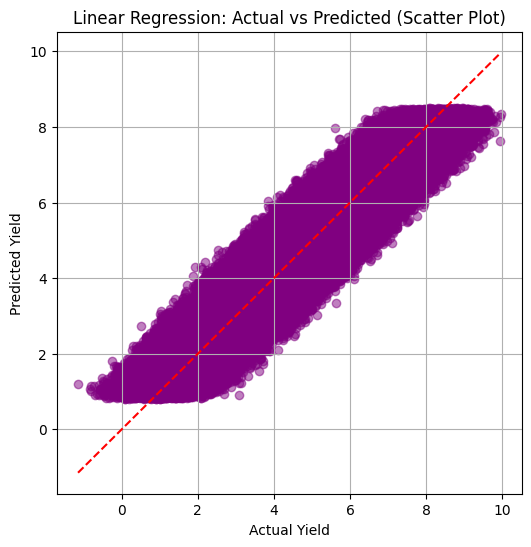

In [75]:
# Scatter Plot: y_test vs y_pred

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Linear Regression: Actual vs Predicted (Scatter Plot)")
plt.grid(True)
plt.show()

/tmp/ipython-input-76-707935947.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


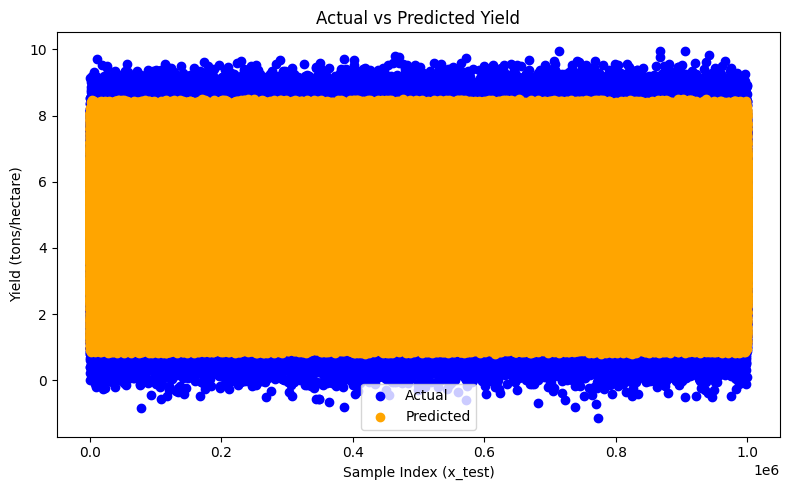

In [76]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test.index, y_test, label='Actual', color='blue')
plt.scatter(X_test.index, y_pred_lr, label='Predicted', color='orange')
plt.xlabel("Sample Index (x_test)")
plt.ylabel("Yield (tons/hectare)")
plt.title("Actual vs Predicted Yield")
plt.legend()
plt.tight_layout()
plt.show()

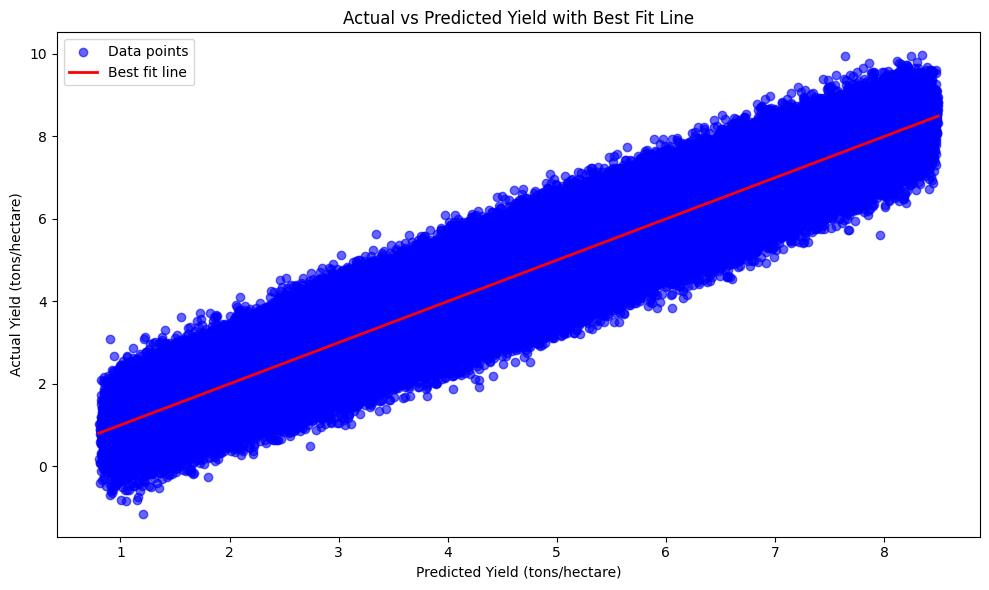

In [77]:
# Reshape y_pred and y_test to 2D arrays for sklearn
y_pred_reshaped = y_pred_lr.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)  # if y_test is a pandas Series

# Fit linear regression: predicted vs actual
model = LinearRegression()
model.fit(y_pred_reshaped, y_test_reshaped)

# Generate points for the regression line
x_line = np.linspace(y_pred_lr.min(), y_pred_lr.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, y_test, label='Data points', color='blue', alpha=0.6)
plt.plot(x_line, y_line, color='red', linewidth=2, label='Best fit line')
plt.xlabel("Predicted Yield (tons/hectare)")
plt.ylabel("Actual Yield (tons/hectare)")
plt.title("Actual vs Predicted Yield with Best Fit Line")
plt.legend()
plt.tight_layout()
plt.show()

In [78]:
def predict_crop_yield(new_data, model_path='/content/yield_predictor_model.joblib',
                      encoder_path='/content/label_encoders.pkl',
                      scaler_path='/content/scaler.pkl'):
    """
    Predicts crop yield for new input data with proper feature name handling.

    Args:
        new_data: DataFrame or dictionary containing input features
        model_path: Path to saved model
        encoder_path: Path to label encoders
        scaler_path: Path to feature scaler

    Returns:
        Dictionary with prediction results
    """
    try:
        # Load artifacts
        model = joblib.load(model_path)
        encoders = joblib.load(encoder_path)
        scaler = joblib.load(scaler_path)

        # Convert input to DataFrame
        if isinstance(new_data, dict):
            input_df = pd.DataFrame([new_data])
        else:
            input_df = new_data.copy()

        # Validate required columns
        required_cols = ['Region', 'Soil_Type', 'Crop', 'Rainfall_mm',
                         'Temperature_Celsius', 'Fertilizer_Used',
                         'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest']

        # Check for missing columns
        missing_cols = set(required_cols) - set(input_df.columns)
        if missing_cols:
            raise ValueError(f"Missing required columns: {missing_cols}")

        # Create processed copy
        processed_data = input_df[required_cols].copy()

        # Convert boolean columns to int (critical step)
        processed_data['Fertilizer_Used'] = processed_data['Fertilizer_Used'].astype(int)
        processed_data['Irrigation_Used'] = processed_data['Irrigation_Used'].astype(int)

        # Label encode categorical variables
        cat_cols = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']
        for col in cat_cols:
            le = encoders[col]
            processed_data[col] = le.transform(processed_data[col])

        # Scale numerical features
        num_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Fertilizer_Used', 'Irrigation_Used']
        processed_data[num_cols] = scaler.transform(processed_data[num_cols])

        # Ensure column order matches training data
        processed_data = processed_data[model.feature_names_in_]

        # Make prediction
        prediction = model.predict(processed_data)

        return {
            'predicted_yield': float(prediction[0]),
            'units': 'tons_per_hectare',
            'status': 'success'
        }

    except Exception as e:
        return {
            'error': str(e),
            'status': 'failure'
        }

In [79]:
# Sample input
farm_data = {
    'Region': 'North',
    'Soil_Type': 'Loam',
    'Crop': 'Rice',
    'Rainfall_mm': 450.5,
    'Temperature_Celsius': 22.3,
    'Fertilizer_Used': 1,  # Can be True/False or 1/0
    'Irrigation_Used': 0,
    'Weather_Condition': 'Sunny',
    'Days_to_Harvest': 120
}

# Make prediction
result = predict_crop_yield(farm_data)
print(result)

{'predicted_yield': 4.199367294937337, 'units': 'tons_per_hectare', 'status': 'success'}


In [80]:


def predict_crop_yield(new_data, model_path='/content/yield_predictor_model.joblib',
                      encoder_path='/content/label_encoders.pkl',
                      scaler_path='/content/scaler.pkl'):
    """
    Predicts crop yield for new input data with proper feature name handling.

    Args:
        new_data: DataFrame or dictionary containing input features
        model_path: Path to saved model
        encoder_path: Path to label encoders
        scaler_path: Path to feature scaler

    Returns:
        Dictionary with prediction results
    """
    try:
        # Load artifacts
        model = joblib.load(model_path)
        encoders = joblib.load(encoder_path)
        scaler = joblib.load(scaler_path)

        # Convert input to DataFrame
        if isinstance(new_data, dict):
            input_df = pd.DataFrame([new_data])
        else:
            input_df = new_data.copy()

        # Validate required columns
        required_cols = ['Region', 'Soil_Type', 'Crop', 'Rainfall_mm',
                         'Temperature_Celsius', 'Fertilizer_Used',
                         'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest']

        # Check for missing columns
        missing_cols = set(required_cols) - set(input_df.columns)
        if missing_cols:
            raise ValueError(f"Missing required columns: {missing_cols}")

        # Create processed copy
        processed_data = input_df[required_cols].copy()

        # Convert boolean columns to int (critical step)
        processed_data['Fertilizer_Used'] = processed_data['Fertilizer_Used'].astype(int)
        processed_data['Irrigation_Used'] = processed_data['Irrigation_Used'].astype(int)

        # Label encode categorical variables
        cat_cols = [ 'Crop', 'Weather_Condition']
        for col in cat_cols:
            le = encoders[col]
            processed_data[col] = le.transform(processed_data[col])

        # Scale numerical features
        num_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Fertilizer_Used', 'Irrigation_Used']
        processed_data[num_cols] = scaler.transform(processed_data[num_cols])

        # Ensure column order matches training data
        processed_data = processed_data[model.feature_names_in_]

        # Make prediction
        prediction = model.predict(processed_data)

        return {
            'predicted_yield': float(prediction[0]),
            'units': 'tons_per_hectare',
            'status': 'success'
        }

    except Exception as e:
        return {
            'error': str(e),
            'status': 'failure'
        }

In [81]:
# Sample input
farm_data = {
    'Region': 'North',
    'Soil_Type': 'Loam',
    'Crop': 'Rice',
    'Rainfall_mm': 450.5,
    'Temperature_Celsius': 22.3,
    'Fertilizer_Used': 1,  # Can be True/False or 1/0
    'Irrigation_Used': 0,
    'Weather_Condition': 'Sunny',
    'Days_to_Harvest': 120
}

# Make prediction
result = predict_crop_yield(farm_data,'/content/yield_predictor_model1.joblib',
                          '/content/label_encoders1.pkl',
                           '/content/scaler1.pkl')
print(result)

{'predicted_yield': 4.201400671940148, 'units': 'tons_per_hectare', 'status': 'success'}


Refrences>>>